## Practical Work 1

For this practical work, the trainees will develop a Python program that is able to implement the gradient descent in order to achieve the linear regression (Single and Multivariables) of a set of datapoints.

#### Import numpy, matplotlib.pyplot and any library you will need

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

#### Read RegData csv file into numpy array 

In [2]:
data = np.genfromtxt('RegData.csv',delimiter=',')

In [3]:
data

array([[2.9000001 , 4.        ],
       [6.69999981, 7.4000001 ],
       [4.9000001 , 5.        ],
       [7.9000001 , 7.19999981],
       [9.80000019, 7.9000001 ],
       [6.9000001 , 6.0999999 ],
       [6.0999999 , 6.        ],
       [6.19999981, 5.80000019],
       [6.        , 5.19999981],
       [5.0999999 , 4.19999981],
       [4.69999981, 4.        ],
       [4.4000001 , 4.4000001 ],
       [5.80000019, 5.19999981]])

#### Define variables X and y. 
#### Assign first column data to X and second column to y
<b>Note:</b> X is the independent variable (input to LR model) and y is the dependent variable (output)

In [4]:
X = data[:,0]
y = data[:,1]

#### Explore your data

In [5]:
X

array([2.9000001 , 6.69999981, 4.9000001 , 7.9000001 , 9.80000019,
       6.9000001 , 6.0999999 , 6.19999981, 6.        , 5.0999999 ,
       4.69999981, 4.4000001 , 5.80000019])

In [6]:
y

array([4.        , 7.4000001 , 5.        , 7.19999981, 7.9000001 ,
       6.0999999 , 6.        , 5.80000019, 5.19999981, 4.19999981,
       4.        , 4.4000001 , 5.19999981])

#### Plot the original data (scatter plot of X,y)

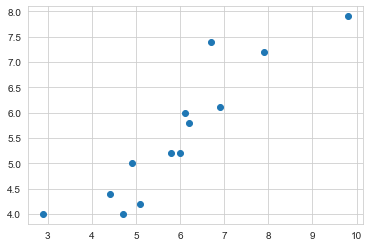

In [7]:
plt.scatter(X,y)

## LR Full Implementation

### Step1: Initialize parameters (theta_0 & theta_1) with random value or simply zero. Also choose the Learning rate.

In [8]:
theta_0 = 0
theta_1 = 0

In [36]:
LR = 0.001

### Step2: Use (theta_0 & theta_1) to predict the output h(x)= theta_0 + theta_1 * x.
#### Note: you will need to iterate through all data points

In [37]:
hx = theta_0 + theta_1*X

### Step3: Calculate the MSE Cost function 𝑱(theta_0,theta_1 ).
<b>Note:</b> You better use either dot product or norm square of the error vector.

In [38]:
m = data.shape[0]
n = data.shape[1]

In [39]:
error = hx-y
print("error vector is: {}".format(error))
MSE = np.dot(error,error)/(m*2)
print("j = {}".format(MSE))

error vector is: [-3.99571541 -7.3903929  -4.99291404 -7.18871179 -7.88605078 -6.09011257
 -5.99123322 -5.79109334 -5.19137309 -4.19263371 -3.99319418 -4.39361448
 -5.19165323]
j = 16.255098672372945


### Step4: Calculate the gradient components for theta_0 and theta_1.
<b>Note:</b> You can use the error vector calculated in the previous step.

In [40]:
grad0 = np.sum(error)*(1/m)
grad1 = np.sum(error*X)*(1/m)
grad0, grad1

(-5.560668672449298, -34.98906624080811)

### Step5: Update the parameters (simultaneously).

In [41]:
theta_0 = theta_0 - LR*grad0
theta_1 = theta_1 - LR*grad1
theta_0, theta_1

(0.005783270897126006, 0.0363897515910236)

### Step6: Repeat from 2 to 5 until converge to the minimum or achieve maximum iterations.
#### The objective from this step is to combine all the previous steps and iterate untill you either achieve the maximum number of iterations or reach the minimum.

In [42]:
def train(X,y,theta_0,theta_1):
    hx = theta_0 + theta_1*X
    error = hx-y
    MSE = np.dot(error,error)/(m*2)
    grad0 = np.sum(error)*(1/m)
    grad1 = np.sum(error*X)*(1/m)
    theta_0 = theta_0 - LR*grad0
    theta_1 = theta_1 - LR*grad1
    return MSE, np.linalg.norm([grad0,grad1],2), theta_0, theta_1

In [47]:
theta_0 = 0
theta_1 = 0
for i in range(5000):
    print("-----------------ITERATION {}-------------".format(i))
    MSE, norm, theta_0, theta_1 = train(X,y,theta_0, theta_1)
    print("J = {}".format(MSE))
    print("graident norm {}".format(norm))
    print("new theta 0 = {}".format(theta_0))
    print("new theta 1 = {}".format(theta_1))

-----------------ITERATION 0-------------
J = 16.305384479692314
graident norm 35.483622652335995
new theta 0 = 0.005569230739769231
new theta 1 = 0.03504384604321537
-----------------ITERATION 1-------------
J = 15.070907994095792
graident norm 34.09644818591864
new theta 0 = 0.010924246580564925
new theta 1 = 0.06871715274511
-----------------ITERATION 2-------------
J = 13.931064553305799
graident norm 32.763503786291054
new theta 0 = 0.01607342171768198
new theta 1 = 0.10107349950678265
-----------------ITERATION 3-------------
J = 12.878599687059797
graident norm 31.482669418337498
new theta 0 = 0.021024802968708463
new theta 1 = 0.13216437111584672
-----------------ITERATION 4-------------
J = 11.906815045206717
graident norm 30.251907927436857
new theta 0 = 0.025786122571909754
new theta 1 = 0.1620392396324827
-----------------ITERATION 5-------------
J = 11.009525766120202
graident norm 29.069261799388045
new theta 0 = 0.030364810484277395
new theta 1 = 0.19074564307426725
----

#### Predict y values using the LR equation
##### h(x)= theta_0 + theta_1 * x

In [48]:
hx = theta_0 + theta_1*X
print(hx)
print(y)

[2.94832331 6.13059287 4.62320215 7.13552041 8.72665539 6.29808099
 5.62812929 5.71187316 5.54438543 4.79068987 4.45571403 4.20448244
 5.37689771]
[4.         7.4000001  5.         7.19999981 7.9000001  6.0999999
 6.         5.80000019 5.19999981 4.19999981 4.         4.4000001
 5.19999981]


#### Plot  LR equation output (fitted line) with the original data (scatter plot of X,y)

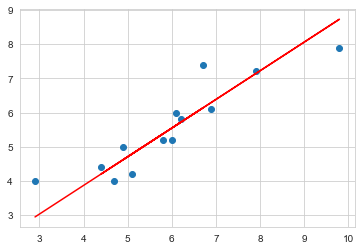

In [49]:
plt.scatter(X,y)
plt.plot(X,hx, color='red')

#### Use R2 score to evaluate LR equation output
https://en.wikipedia.org/wiki/Coefficient_of_determination

In [50]:
from sklearn.metrics import r2_score
r2_score(y,hx)

0.7840129353899562

## Plot loss function
### Repeat your implementaion version and save loss for each iteration (epoch)

In [51]:
theta_0 = 0
theta_1 = 0
epochs = 40
loss = []
for i in range(epochs):
    print("-----------------ITERATION {}-------------".format(i))
    MSE, norm, theta_0, theta_1 = train(X,y,theta_0, theta_1)
    print("J = {}".format(MSE))
    print("graident norm {}".format(norm))
    print("new theta 0 = {}".format(theta_0))
    print("new theta 1 = {}".format(theta_1))
    loss.append(MSE)

-----------------ITERATION 0-------------
J = 16.305384479692314
graident norm 35.483622652335995
new theta 0 = 0.005569230739769231
new theta 1 = 0.03504384604321537
-----------------ITERATION 1-------------
J = 15.070907994095792
graident norm 34.09644818591864
new theta 0 = 0.010924246580564925
new theta 1 = 0.06871715274511
-----------------ITERATION 2-------------
J = 13.931064553305799
graident norm 32.763503786291054
new theta 0 = 0.01607342171768198
new theta 1 = 0.10107349950678265
-----------------ITERATION 3-------------
J = 12.878599687059797
graident norm 31.482669418337498
new theta 0 = 0.021024802968708463
new theta 1 = 0.13216437111584672
-----------------ITERATION 4-------------
J = 11.906815045206717
graident norm 30.251907927436857
new theta 0 = 0.025786122571909754
new theta 1 = 0.1620392396324827
-----------------ITERATION 5-------------
J = 11.009525766120202
graident norm 29.069261799388045
new theta 0 = 0.030364810484277395
new theta 1 = 0.19074564307426725
----

### Plot loss vs. iterations

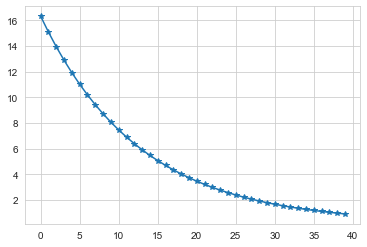

In [52]:
plt.plot(np.arange(0,epochs),loss,  marker='*', linestyle='-')

## Multivariate LR

#### Read MultiVarLR csv file into numpy array.
#### The first three columns are x1,x2, and x3.
#### The last column is the target label y.

In [53]:
data2 = np.genfromtxt('MultiVarLR.csv',delimiter=',')

In [54]:
data2

array([[ 73.,  80.,  75., 152.],
       [ 93.,  88.,  93., 185.],
       [ 89.,  91.,  90., 180.],
       [ 96.,  98., 100., 196.],
       [ 73.,  66.,  70., 142.],
       [ 53.,  46.,  55., 101.],
       [ 69.,  74.,  77., 149.],
       [ 47.,  56.,  60., 115.],
       [ 87.,  79.,  90., 175.],
       [ 79.,  70.,  88., 164.],
       [ 69.,  70.,  73., 141.],
       [ 70.,  65.,  74., 141.],
       [ 93.,  95.,  91., 184.],
       [ 79.,  80.,  73., 152.],
       [ 70.,  73.,  78., 148.],
       [ 93.,  89.,  96., 192.],
       [ 78.,  75.,  68., 147.],
       [ 81.,  90.,  93., 183.],
       [ 88.,  92.,  86., 177.],
       [ 78.,  83.,  77., 159.],
       [ 82.,  86.,  90., 177.],
       [ 86.,  82.,  89., 175.],
       [ 78.,  83.,  85., 175.],
       [ 76.,  83.,  71., 149.],
       [ 96.,  93.,  95., 192.]])

In [55]:
X2 = data2[:,:3]
X2

array([[ 73.,  80.,  75.],
       [ 93.,  88.,  93.],
       [ 89.,  91.,  90.],
       [ 96.,  98., 100.],
       [ 73.,  66.,  70.],
       [ 53.,  46.,  55.],
       [ 69.,  74.,  77.],
       [ 47.,  56.,  60.],
       [ 87.,  79.,  90.],
       [ 79.,  70.,  88.],
       [ 69.,  70.,  73.],
       [ 70.,  65.,  74.],
       [ 93.,  95.,  91.],
       [ 79.,  80.,  73.],
       [ 70.,  73.,  78.],
       [ 93.,  89.,  96.],
       [ 78.,  75.,  68.],
       [ 81.,  90.,  93.],
       [ 88.,  92.,  86.],
       [ 78.,  83.,  77.],
       [ 82.,  86.,  90.],
       [ 86.,  82.,  89.],
       [ 78.,  83.,  85.],
       [ 76.,  83.,  71.],
       [ 96.,  93.,  95.]])

In [56]:
y2 = data2[:,3]
y2

array([152., 185., 180., 196., 142., 101., 149., 115., 175., 164., 141.,
       141., 184., 152., 148., 192., 147., 183., 177., 159., 177., 175.,
       175., 149., 192.])

### Generalize your implementation to work for MultiVariables
#### Vectorize your implementation.
<b>Notes:</b> 
- You need to add column that contains ones to the data. This column represent x feature for theta_0.
- Use learninig rate = 0.0001.

In [57]:
m = data2.shape[0]
n = data2.shape[1]

In [58]:
X2.shape

(25, 3)

In [59]:
ones = np.ones((m,1))
X2 = np.concatenate((ones, X2), axis=1)

In [60]:
theta = np.zeros((n,1))
hx = np.matmul(X2,theta)
# 4*1  25*4

In [61]:
# y2=y2.reshape(-1,1)

In [62]:
def train(X,y, theta):
    hx = np.matmul(X,theta)
    error = hx-y
    MSE = np.dot(error.reshape(-1),error.reshape(-1))/(m*2)
    grad = np.matmul(X.T,error)/m
    theta = theta - LR*grad
    return MSE, np.linalg.norm(grad), grad, theta

In [63]:
LR = 0.0001
epochs = 1000
theta = np.zeros((n,1))
loss = []
for i in range(epochs):
    MSE, norm, grads, theta = train(X2,y2.reshape(-1,1),theta)
    loss.append(MSE)
    print("MSE is {}".format(MSE))
    print("GRADIENT NORM is {}".format(norm))
    print("grad is {}".format(grads))

MSE is 13405.98
GRADIENT NORM is 22917.545989219703
grad is [[  -162.04]
 [-13075.8 ]
 [-13147.2 ]
 [-13467.08]]
MSE is 12348.667642841163
GRADIENT NORM is 21994.84565871648
grad is [[  155.55104064]
 [12557.30425376]
 [12626.9593024 ]
 [12908.25503616]]
MSE is 11374.779042807402
GRADIENT NORM is 21109.294865731517
grad is [[  -149.25298186]
 [-12043.77704949]
 [-12109.51113768]
 [-12405.12908697]]
MSE is 10477.731860896016
GRADIENT NORM is 20259.397905121834
grad is [[  143.27934356]
 [11566.81097579]
 [11631.00185216]
 [11889.12756568]]
MSE is 9651.463121043076
GRADIENT NORM is 19443.71929146172
grad is [[  -137.47487245]
 [-11093.18411262]
 [-11153.70032032]
 [-11426.96617447]]
MSE is 8890.388231093188
GRADIENT NORM is 18660.881334491896
grad is [[  131.9759328 ]
 [10654.46925664]
 [10713.626124  ]
 [10950.41436054]]
MSE is 8189.363237116855
GRADIENT NORM is 17909.561812185344
grad is [[  -126.62606644]
 [-10217.59615603]
 [-10273.30715736]
 [-10525.98019124]]
MSE is 7543.6500559562

#### Predict y values using the LR equation
##### X@thetas

In [64]:
hx = np.matmul(X2,theta)
hx

array([[152.87121322],
       [184.85674383],
       [181.47483649],
       [198.75052368],
       [140.34382743],
       [105.31205204],
       [150.10779197],
       [113.11610301],
       [174.37742357],
       [164.06972743],
       [143.81388672],
       [142.72273052],
       [186.36979543],
       [153.41203893],
       [151.08774876],
       [188.54161627],
       [145.10262039],
       [180.58785665],
       [177.3277855 ],
       [158.74612896],
       [175.79168644],
       [174.43302327],
       [167.19171348],
       [151.52786662],
       [190.88314212]])

### Plot loss vs. iterations

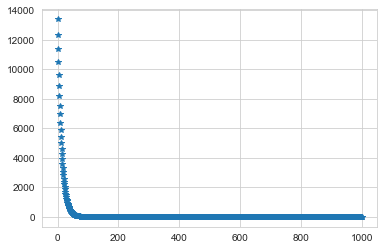

In [65]:
plt.plot(np.arange(epochs), loss,'*')

#### Use R2 score to evaluate LR equation output

In [66]:
r2_score(y2,hx)

0.9886850607889688